# 🏠California Housing Dataset

### 1. Import necessary libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# For Train-Test split
from sklearn.model_selection import train_test_split

# For Feature Scaling
from sklearn.preprocessing import StandardScaler

# For Linear Regression
from sklearn.linear_model import LinearRegression

# For Mean Squared Error
from sklearn.metrics import mean_squared_error

# For KNN
from sklearn.neighbors import KNeighborsRegressor

# For Random Forest
from sklearn.ensemble import RandomForestRegressor

### 2. Load the Data

In [2]:
data = pd.read_csv('housing.csv')

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Understanding the data:**

* `longitude`: Measures how far west a house is; a higher value is farther west.

* `latitude`: Measures how far north a house is; a higher value is farther north.

* `medianHouseValue`: Median house value for households within a block (measured in US Dollars).

* `oceanProximity`: Location of the house with respect to the ocean/sea.  

* What we are going to do is use all these values to find the `medianHouseValue`(dependent variable) using our independent varaibles.

* So, it is called a regression problem where we will find the continuous value, as all the other variables are continuous except `ocenProximity` but we can fix it with transformation.

* To do this, we are going to use a technique called **Supervised Learning**.

In [3]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
# Randomizing the data

data_shuffled = data.sample(n=len(data), random_state = 1)
data_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


### 3. Preprocessing

In [5]:
pd.get_dummies(data_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


The operation `pd.get_dummies(data_shuffled['ocean_proximity'])` is called **One-Hot Encoding**.

### What is One-Hot Encoding?

One-Hot Encoding is a process used to convert categorical variables into a format that can be provided to machine learning algorithms to improve predictions. Here's what happens in this process:

- **Each category** in the column `ocean_proximity` is converted into a new binary (0 or 1) column.
- For each row, the column corresponding to the category value will have a `1`, and all other columns will have `0`.

### Example:
If `data_shuffled['ocean_proximity']` has values like:
```
near ocean, inland, near ocean, near bay
```

The `pd.get_dummies()` function would convert it to:
| near_ocean | inland | near_bay |
|------------|--------|----------|
| 1          | 0      | 0        |
| 0          | 1      | 0        |
| 1          | 0      | 0        |
| 0          | 0      | 1        |

### Why Use One-Hot Encoding?

- **Machine learning algorithms** often require input to be numeric.
- **One-hot encoding** ensures that categorical variables do not introduce a sense of **ordinality** (order), which might confuse models like regression or decision trees.


In [6]:
data_shuffled.drop('ocean_proximity', axis = 1).head() # Dropped the `ocean_proximity` column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [7]:
data_final = pd.concat(
    [data_shuffled.drop('ocean_proximity', axis=1), 
     pd.get_dummies(data_shuffled['ocean_proximity'], prefix='ocean_proximity')],
    axis=1
)


In [8]:
data_final = data_final[[
    "longitude",
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "ocean_proximity_<1H OCEAN",
    "ocean_proximity_INLAND",
    "ocean_proximity_ISLAND",
    "ocean_proximity_NEAR BAY",
    "ocean_proximity_NEAR OCEAN",
    "median_house_value"
]]

data_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


### 4. EDA

In [9]:
data_final.isnull().sum() # 207 missing values for `total_bedrooms` 


longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
median_house_value              0
dtype: int64

In [10]:
data_final = data_final.dropna()

In [11]:
print(data_final.isnull().sum())


longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
median_house_value            0
dtype: int64


In [12]:
len(data_final)

20433

### 5. Training and Testing data

In [13]:
X = data_final.drop('median_house_value', axis=1)  # Features
y = data_final['median_house_value']                 # Target variable

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(16346, 13)

In [16]:
y_train.shape

(16346,)

### 6. Feature Scaling

In [17]:
# Specify the columns to scale
columns_to_scale = ['longitude', 'latitude', 'housing_median_age', 
                    'total_rooms', 'total_bedrooms', 
                    'population', 'households', 'median_income']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = X_train.copy()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Transform the test data
X_test_scaled = X_test.copy()
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [18]:
X_train_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
18720,-1.397258,2.327431,-1.707955,1.151666,1.872954,0.981490,2.031066,-0.770342,0,1,0,0,0
8670,0.595924,-0.844808,0.271837,0.079711,0.160041,-0.076667,0.282616,0.370053,1,0,0,0,0
4295,0.635788,-0.718480,0.034262,-0.181132,0.594731,0.718469,0.619854,-0.810558,1,0,0,0,0
2704,1.991151,-1.308011,0.192645,-0.519549,-0.587156,-0.405659,-0.560479,-0.179087,0,1,0,0,0
13469,1.099203,-0.718480,0.271837,0.443078,0.216433,0.611699,0.241110,-0.305909,0,1,0,0,0


In [19]:
X_test_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
19832,0.092646,0.427831,0.351029,-0.079063,-0.006786,0.524026,0.056926,-1.237731,0,1,0,0,0
8511,0.625822,-0.807378,0.113453,-0.105374,0.098949,0.258401,0.080273,-0.204947,1,0,0,0,0
13071,-0.869065,1.377631,-1.549572,0.049317,-0.042031,0.205450,0.168474,-0.183837,0,1,0,0,0
3498,0.556060,-0.634261,0.351029,-0.655641,-0.728136,-0.509825,-0.700563,-0.085778,1,0,0,0,0
3368,-0.315957,2.168351,-0.203313,-0.109003,-0.049080,-0.337951,-0.148011,-0.628585,0,1,0,0,0


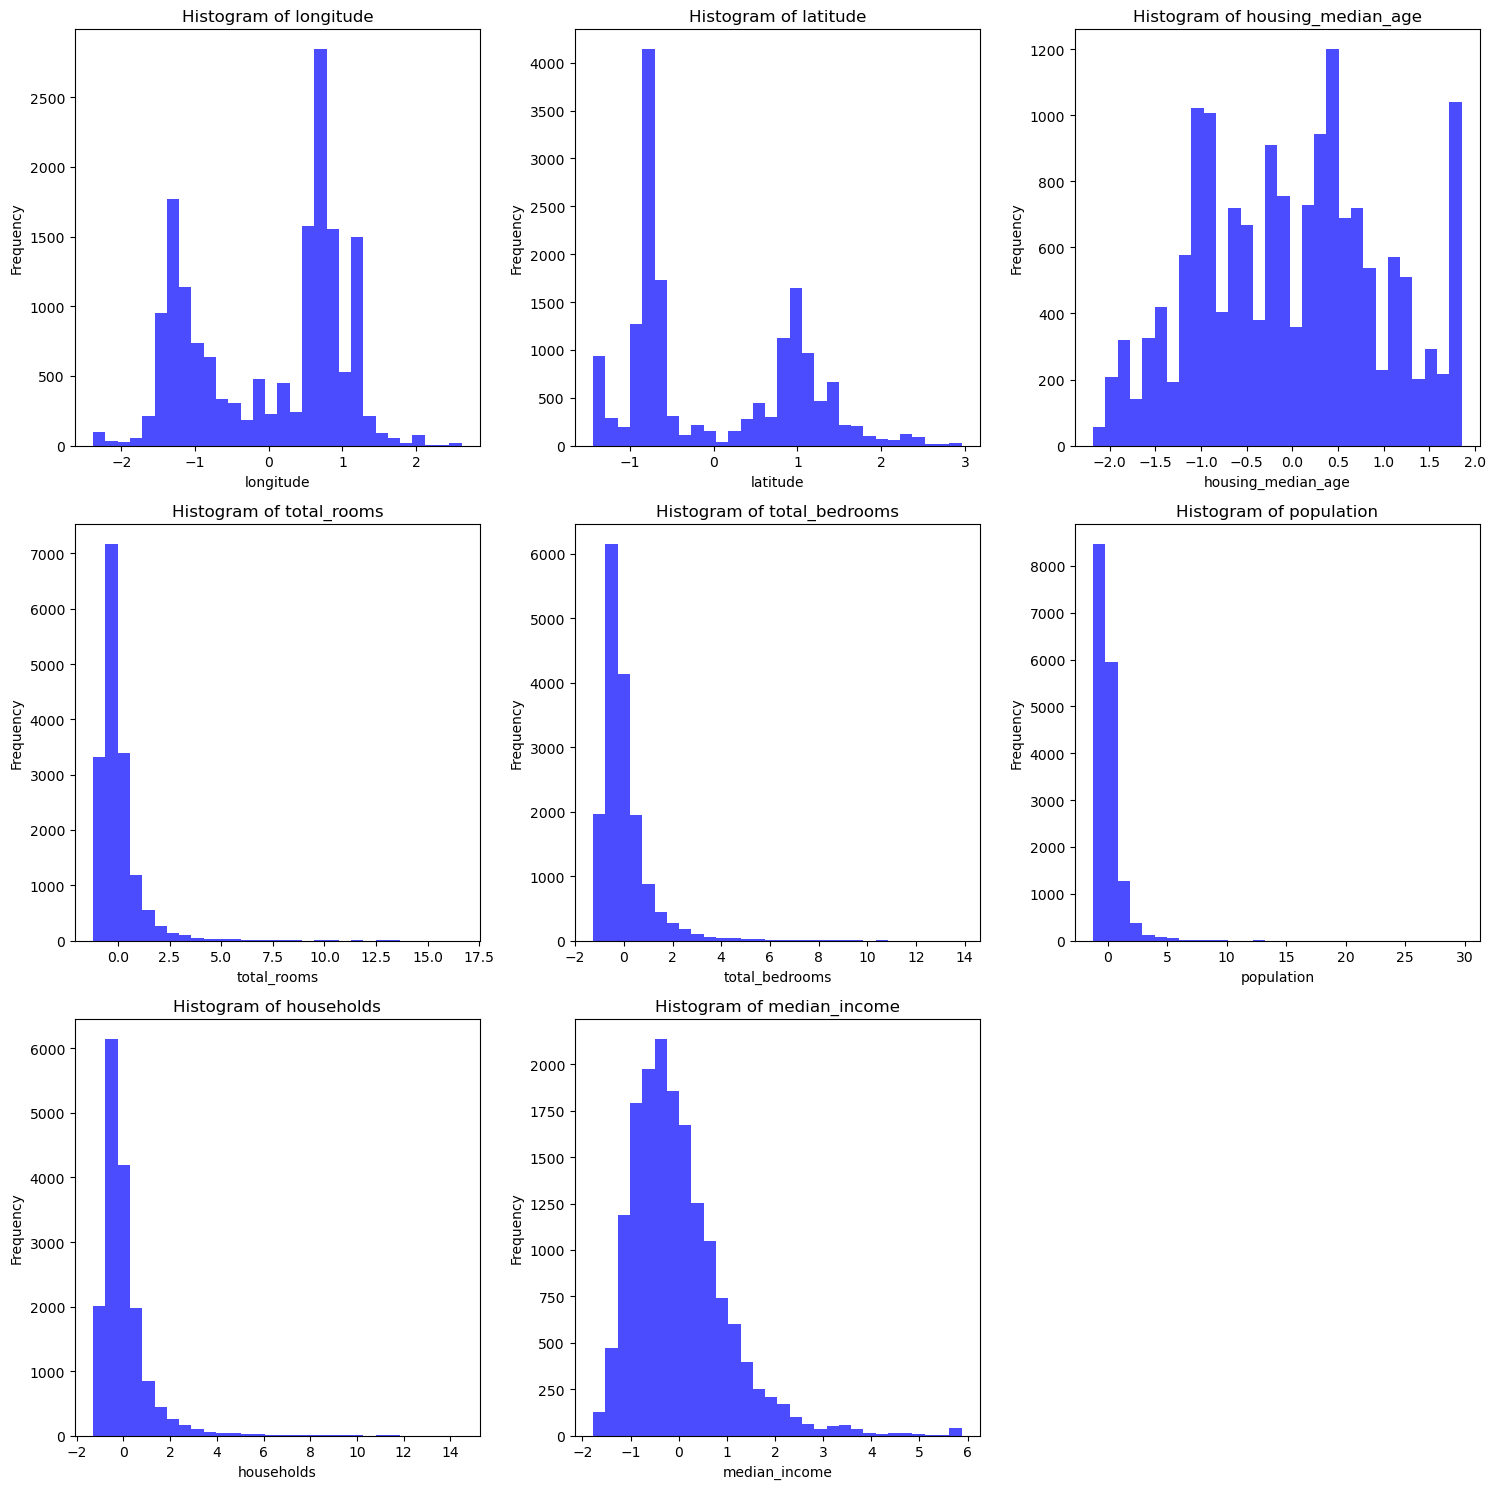

In [20]:
# Specify the columns to scale
columns_to_scale = ['longitude', 'latitude', 'housing_median_age', 
                    'total_rooms', 'total_bedrooms', 
                    'population', 'households', 'median_income']

# Create subplots
cols = 3  # Number of columns
rows = (len(columns_to_scale) + cols - 1) // cols  # Calculate the required rows

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten to easily access axes

# Loop through each specified feature and create histograms
for i, column in enumerate(columns_to_scale):
    axes[i].hist(X_train_scaled[column], bins=30, color='blue', alpha=0.7)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### 7. Linear Regression

In [21]:
model = LinearRegression()       # Create a linear regression model
model.fit(X_train_scaled, y_train)  # Fit the model to the training data

LinearRegression()

In [22]:
# Predict on the training data
y_pred = model.predict(X_train_scaled)

In [23]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4763279208.172229


In [24]:
# Get the first 5 rows from the scaled training data
X_sample = X_train_scaled.head(5)

# Make predictions on the sample data
predicted_values = model.predict(X_sample)

# Get the original prices for the first 5 entries
original_values = y_train.head(5)

# Create a DataFrame to compare predicted and original values
comparison_df = pd.DataFrame({
    'Original Values': original_values,
    'Predicted Values': predicted_values
})

comparison_df['Absolute Error'] = abs(comparison_df['Original Values'] - comparison_df['Predicted Values'])
comparison_df['Percentage Error'] = (comparison_df['Absolute Error'] / comparison_df['Original Values']) * 100

print(comparison_df)



       Original Values  Predicted Values  Absolute Error  Percentage Error
18720         111400.0     105557.467130     5842.532870          5.244644
8670          381200.0     278251.948767   102948.051233         27.006309
4295          172500.0     173105.588813      605.588813          0.351066
2704           67500.0     122793.217930    55293.217930         81.915878
13469          95500.0     123001.516580    27501.516580         28.797400


### 8. Random Forest

In [26]:
# Create and fit the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Predict on the training data
y_pred_rf = rf_model.predict(X_train_scaled)

In [28]:
# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_train, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

Mean Squared Error (Random Forest): 342560591.15220404


In [32]:
# Make predictions and create comparison DataFrame
comparison_df_rf = pd.DataFrame({
    'Original Values': y_train.head(5),
    'Predicted Values': rf_model.predict(X_train_scaled.head(5))
})

# Calculate errors
comparison_df_rf['Absolute Error'] = abs(comparison_df_rf['Original Values'] - comparison_df_rf['Predicted Values'])
comparison_df_rf['Percentage Error'] = comparison_df_rf['Absolute Error'] / comparison_df_rf['Original Values'] * 100

print(comparison_df_rf)

       Original Values  Predicted Values  Absolute Error  Percentage Error
18720         111400.0         108903.00         2497.00          2.241472
8670          381200.0         381257.06           57.06          0.014969
4295          172500.0         193262.00        20762.00         12.035942
2704           67500.0          71232.00         3732.00          5.528889
13469          95500.0         100206.00         4706.00          4.927749


### 9. KNN

In [34]:
# Create a KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors


In [35]:
# Fit the model on the scaled training data
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [36]:
# Predict on the training data
y_pred_knn = knn_model.predict(X_train_scaled)

In [37]:
# Calculate Mean Squared Error
mse_knn = mean_squared_error(y_train, y_pred_knn)
print(f'Mean Squared Error (KNN): {mse_knn}')

Mean Squared Error (KNN): 2485715622.9271946


In [38]:
# Compare predicted and original values for the first 5 entries
comparison_df_knn = pd.DataFrame({
    'Original Values': y_train.head(5),
    'Predicted Values': knn_model.predict(X_train_scaled.head(5))
})

# Calculate Absolute and Percentage Error
comparison_df_knn['Absolute Error'] = abs(comparison_df_knn['Original Values'] - comparison_df_knn['Predicted Values'])
comparison_df_knn['Percentage Error'] = (comparison_df_knn['Absolute Error'] / comparison_df_knn['Original Values']) * 100

print(comparison_df_knn)


       Original Values  Predicted Values  Absolute Error  Percentage Error
18720         111400.0          106740.0          4660.0          4.183124
8670          381200.0          334880.0         46320.0         12.151102
4295          172500.0          197460.0         24960.0         14.469565
2704           67500.0           76460.0          8960.0         13.274074
13469          95500.0           99360.0          3860.0          4.041885


### 10. Model Comparison

In [44]:
    # Calculate Mean Squared Error for the test set
    mse_results = {
        'Linear Regression': mse,
        'Random Forest': mse_rf,
        'KNN': mse_knn
    }

    # Create a DataFrame to display results
    mse_comparison_df = pd.DataFrame(mse_results.items(), columns=['Model', 'Mean Squared Error'])

    # Print the comparison
    print(mse_comparison_df)


               Model  Mean Squared Error
0  Linear Regression        9.889867e+09
1      Random Forest        3.425606e+08
2                KNN        2.485716e+09


**Conclusion:**
* **Random Forest** has the lowest MSE, indicating that it performs the best among the three models for your dataset.
* Lower MSE means the model's predictions are closer to the actual values